# Importing Libraries and Dataset

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import itertools
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from tqdm import tqdm_notebook
from itertools import product
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import HoltWintersResults
from datetime import datetime
import statsmodels.tsa.api as smt
from pylab import rcParams
import seaborn as sns

In [2]:
data = pd.read_csv('02-Dataset v0.02.csv')

### Cleaning

In [3]:
data.head()

,timest,station,param,level,isinvalid
0,2016-01-20 16:00:00,1.0,1,81.79,0
1,2016-01-20 16:00:00,2.0,1,106.47,0
2,2016-01-20 16:00:00,3.0,1,121.81,0
3,2016-01-20 16:00:00,4.0,1,140.35,0
4,2016-01-20 16:00:00,5.0,1,25.27,0


In [4]:
data.describe()

,station,param,level
count,1.252198e+06,1.252199e+06,1.252198e+06
mean,3.467163e+00,5.616747e+00,8.464470e+01
std,1.677388e+00,3.567317e+00,2.255393e+02
min,-1.000000e+00,0.000000e+00,-1.569013e+04
25%,2.000000e+00,2.000000e+00,1.200000e+00
50%,3.000000e+00,6.000000e+00,8.710000e+00
75%,5.000000e+00,9.000000e+00,4.549000e+01
max,1.000000e+01,1.100000e+01,1.098377e+04


In [5]:
data.shape

(1252199, 5)

In [6]:
data.isna().sum()

timest       0
station      1
param        0
level        1
isinvalid    0
dtype: int64

#### Fill missing Values

In [7]:
data.dropna(how='any', inplace=True)
data.isna().sum()

timest       0
station      0
param        0
level        0
isinvalid    0
dtype: int64

In [8]:
data.dtypes

timest        object
station      float64
param          int64
level        float64
isinvalid     object
dtype: object

#### Change Data Type

In [9]:
data['timest'] = pd.to_datetime(data['timest'], infer_datetime_format=True, errors='coerce')
data.dtypes

timest       datetime64[ns]
station             float64
param                 int64
level               float64
isinvalid            object
dtype: object

In [10]:
data = data.set_index('timest')

In [11]:
datapara0 = data[data['param'] == 0].resample('MS').mean()
datapara1 = data[data['param'] == 1].resample('MS').mean()
datapara2 = data[data['param'] == 2].resample('MS').mean()
datapara3 = data[data['param'] == 3].resample('MS').mean()
datapara4 = data[data['param'] == 4].resample('MS').mean()
datapara5 = data[data['param'] == 5].resample('MS').mean()
datapara6 = data[data['param'] == 6].resample('MS').mean()
datapara7 = data[data['param'] == 7].resample('MS').mean()
datapara8 = data[data['param'] == 8].resample('MS').mean()
datapara9 = data[data['param'] == 9].resample('MS').mean()
datapara10 = data[data['param'] == 10].resample('MS').mean()
datapara11 = data[data['param'] == 11].resample('MS').mean()

#### Set Date as Index

In [12]:
datapara2.head()

,station,param,level
timest,,,
2016-01-01,3.486704,2,46.450315
2016-02-01,3.451431,2,17.038025
2016-03-01,3.440579,2,7.990103
2016-04-01,3.361551,2,8.025535
2016-05-01,3.381648,2,3.859047


In [13]:
#Set style
sns.set()
rcParams['figure.figsize'] = 12, 7

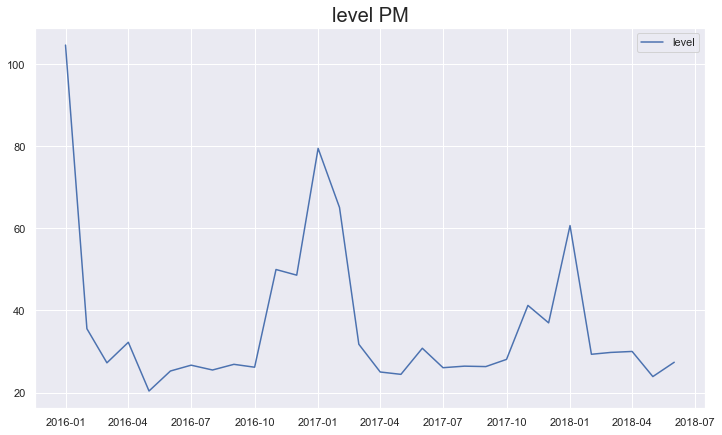

In [14]:
plt.figure()

ax = plt.axes()
ax.set_title('level PM', fontsize=20)
ax.plot(datapara0.level);
ax.legend()

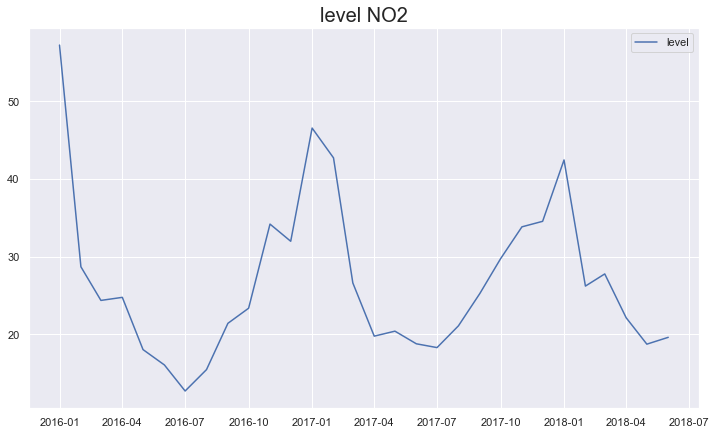

In [15]:
plt.figure()

ax = plt.axes()
ax.set_title('level NO2', fontsize=20)
ax.plot(datapara1.level);
ax.legend()

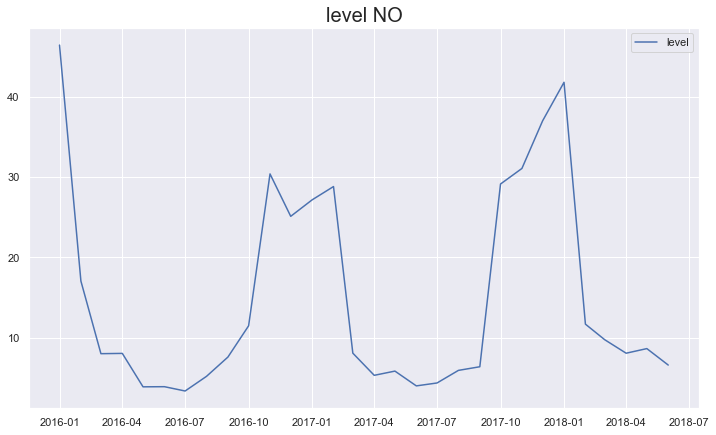

In [16]:
plt.figure()

ax = plt.axes()
ax.set_title('level NO', fontsize=20)
ax.plot(datapara2.level);
ax.legend()

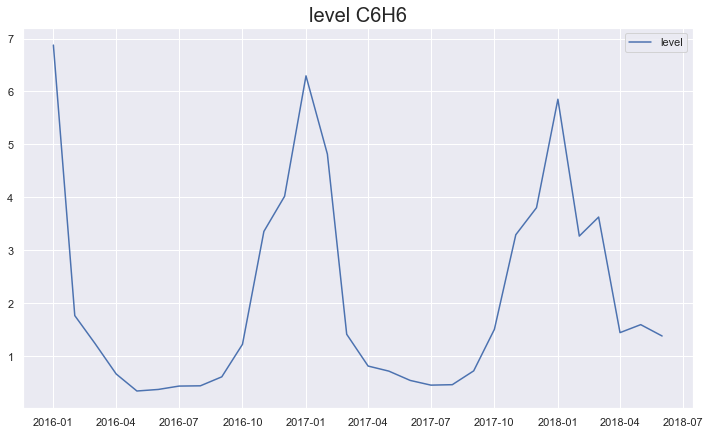

In [17]:
plt.figure()

ax = plt.axes()
ax.set_title('level C6H6', fontsize=20)
ax.plot(datapara3.level);
ax.legend()

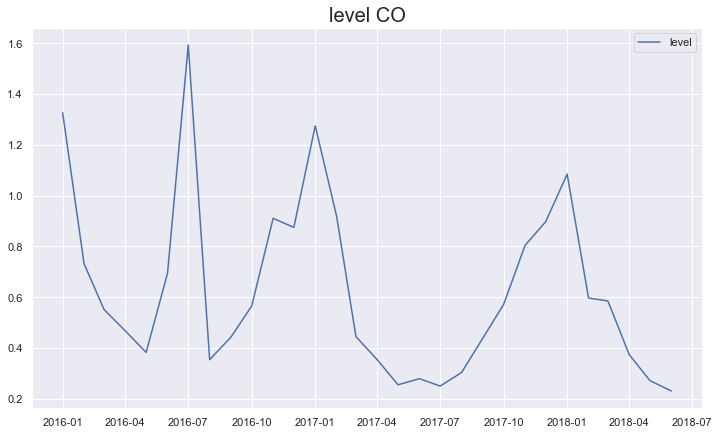

In [18]:
plt.figure()

ax = plt.axes()
ax.set_title('level CO', fontsize=20)
ax.plot(datapara4.level);
ax.legend()

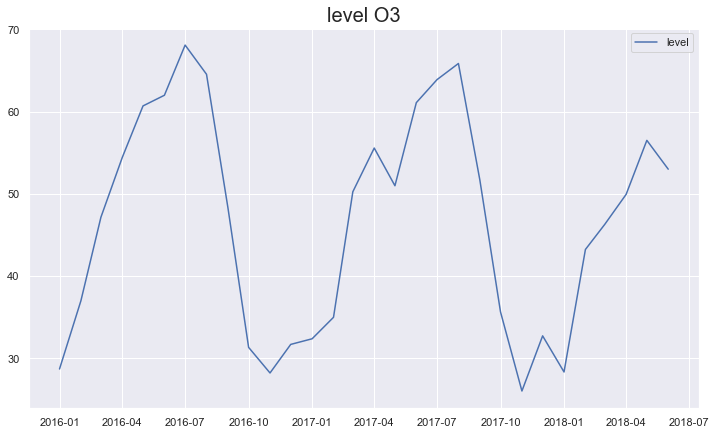

In [19]:
plt.figure()

ax = plt.axes()
ax.set_title('level O3', fontsize=20)
ax.plot(datapara5.level);
ax.legend()

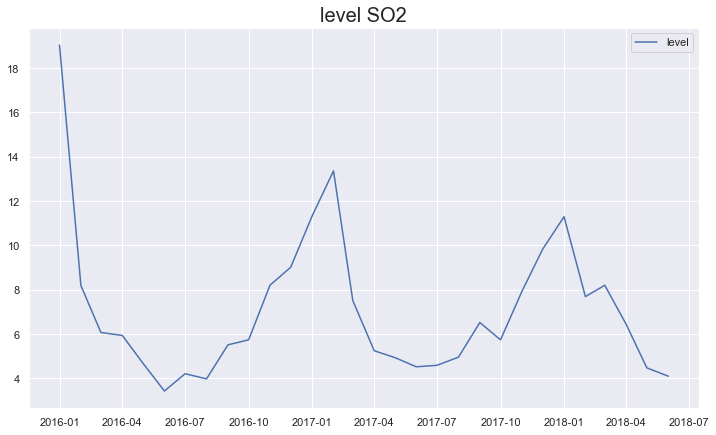

In [20]:
plt.figure()

ax = plt.axes()
ax.set_title('level SO2', fontsize=20)
ax.plot(datapara6.level);
ax.legend()

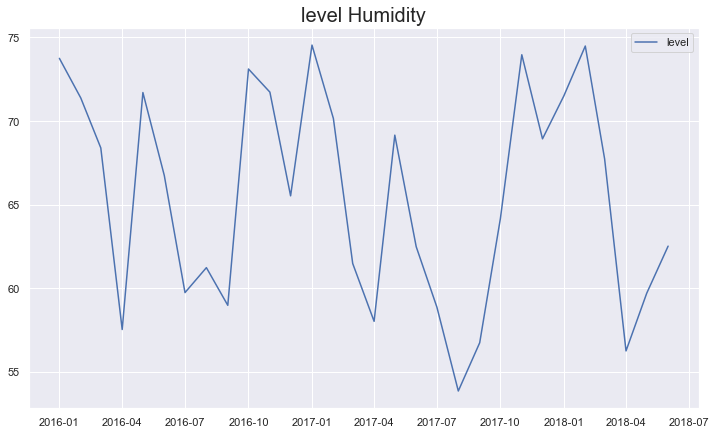

In [21]:
plt.figure()

ax = plt.axes()
ax.set_title('level Humidity', fontsize=20)
ax.plot(datapara7.level);
ax.legend()

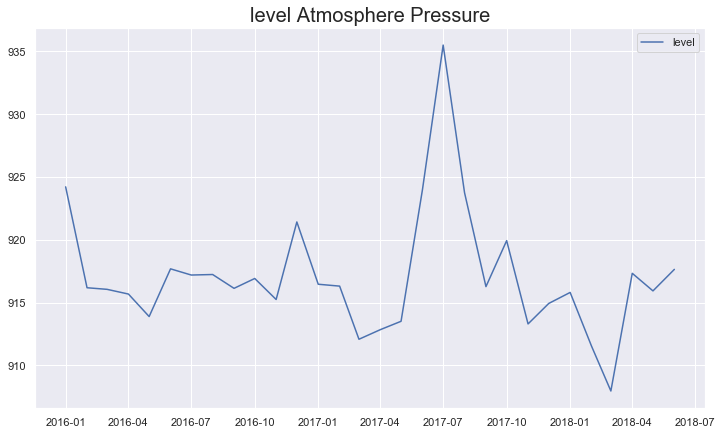

In [22]:
plt.figure()

ax = plt.axes()
ax.set_title('level Atmosphere Pressure', fontsize=20)
ax.plot(datapara8.level);
ax.legend()

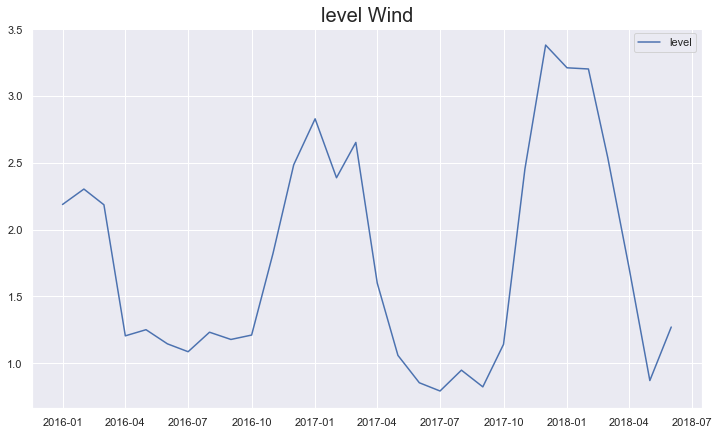

In [23]:
plt.figure()

ax = plt.axes()
ax.set_title('level Wind', fontsize=20)
ax.plot(datapara9.level);
ax.legend()

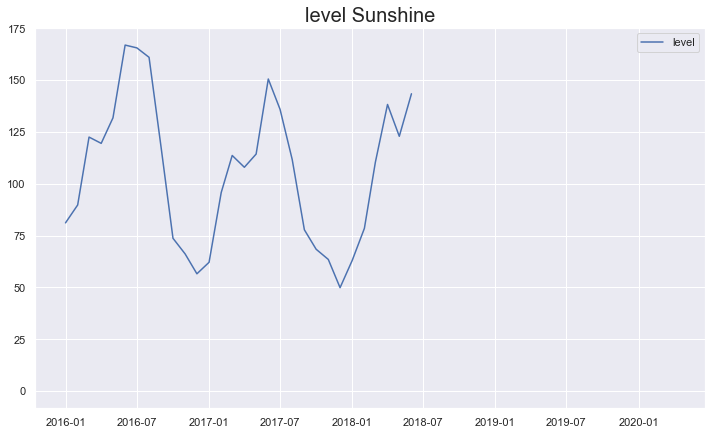

In [24]:
plt.figure()

ax = plt.axes()
ax.set_title('level Sunshine', fontsize=20)
ax.plot(datapara10.level);
ax.legend()

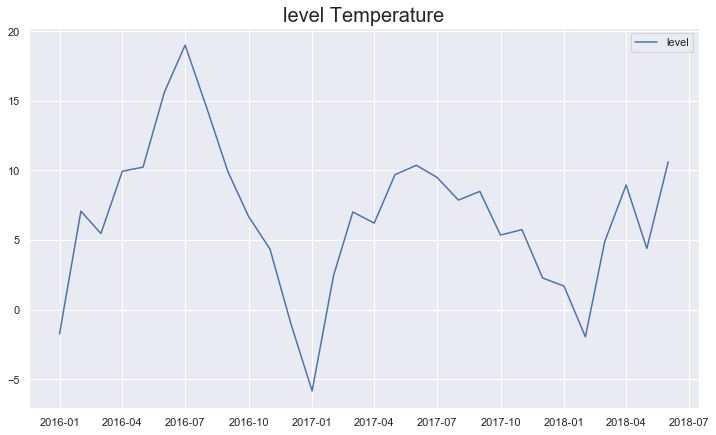

In [25]:
plt.figure()

ax = plt.axes()
ax.set_title('level Temperature', fontsize=20)
ax.plot(datapara11.level);
ax.legend()

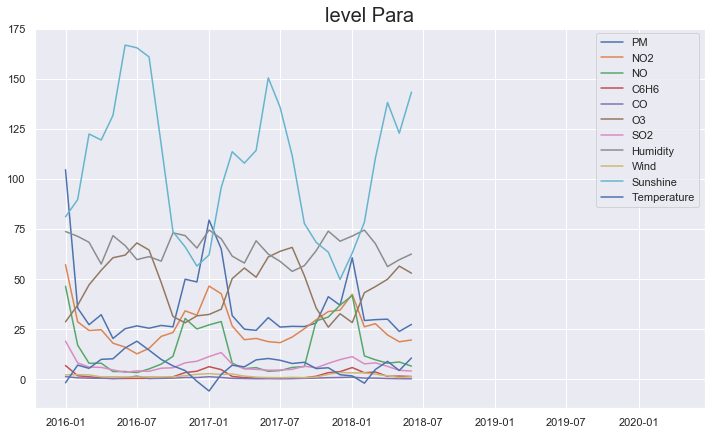

In [26]:
plt.figure()

ax = plt.axes()
ax.set_title('level Para', fontsize=20)
ax.plot(datapara0.level, label="PM");
ax.plot(datapara1.level, label="NO2");
ax.plot(datapara2.level, label="NO");
ax.plot(datapara3.level, label="C6H6");
ax.plot(datapara4.level, label="CO");
ax.plot(datapara5.level, label="O3");
ax.plot(datapara6.level, label="SO2");
ax.plot(datapara7.level, label="Humidity");
#ax.plot(datapara8.level, label="Atmosphere Pressure");
ax.plot(datapara9.level, label="Wind");
ax.plot(datapara10.level, label="Sunshine");
ax.plot(datapara11.level, label="Temperature");
ax.legend()
plt.show()

In [27]:
#Surpress Warnings
warnings.filterwarnings('ignore')

#Execution Code
model = ARMA(datapara0.level, order=(2, 1))
model_ARMA = model.fit(disp=False)
datapara0.predict = model_ARMA.predict()

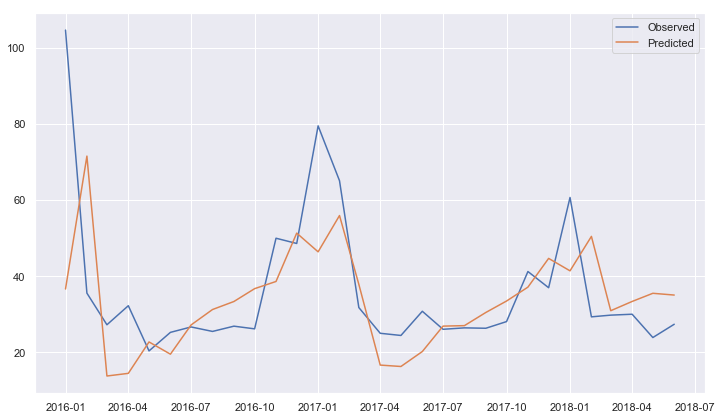

In [28]:
#Visualizing code
plt.figure()

plt.plot(datapara0.level, label='Observed')
plt.plot(datapara0.predict, label='Predicted')

plt.legend();

In [29]:
#Execution Code

#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

625

In [30]:
#Surpress Warnings
warnings.filterwarnings('ignore')

#Execution Code
def optimize_SARIMA(parameters_list, d, D, s):
    
    results = [pd.np.empty((2))]
    
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = SARIMAX(datapara0.level, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            model_SARIMA = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

result_table = optimize_SARIMA(parameters_list, d, D, s);

In [31]:
#Exectution Code

#Set parameters that give the lowest AIC (Akaike Information Criteria)

p, q, P, Q = result_table.parameters[1]

model_SARIMA = SARIMAX(datapara0.level, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=False)

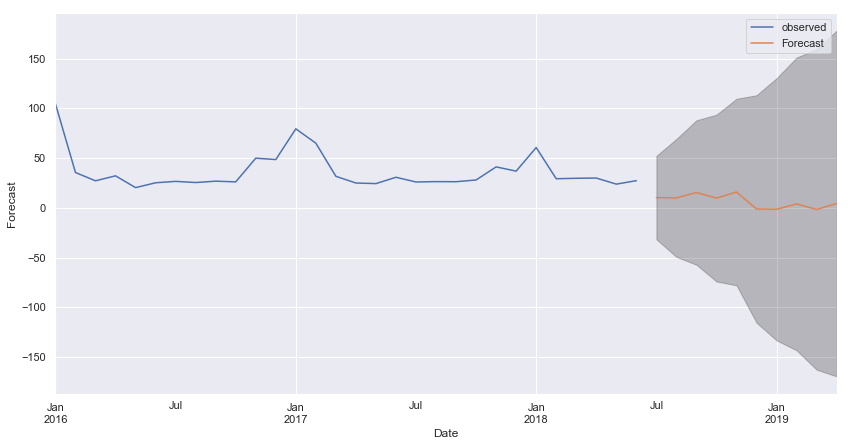

In [32]:
#Visualizing code
pred_uc = model_SARIMA.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = datapara0.level.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Forecast')
plt.legend()
plt.show()

In [33]:
y_true = datapara0['level']
y_pred_SARIMA = model_SARIMA.predict()

#Fiding the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Finding the MAPA
Accuracy_SARIMA = 100 - mean_absolute_percentage_error(y_true, y_pred_SARIMA)

print('SARIMA: ',Accuracy_SARIMA)

SARIMA:  42.47966994394034


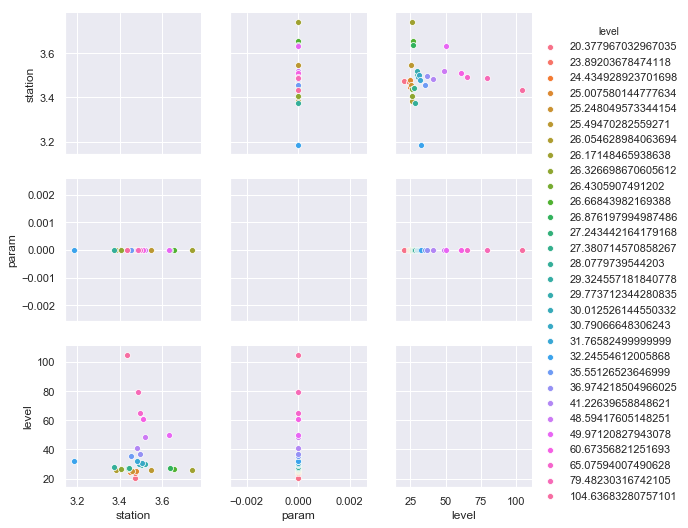

In [34]:
sns.pairplot(datapara0,hue='level', height=2.5);

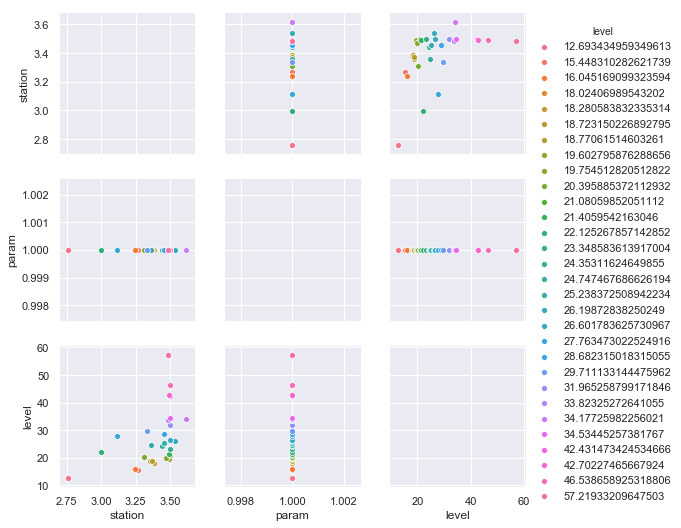

In [35]:
sns.pairplot(datapara1,hue='level', height=2.5);

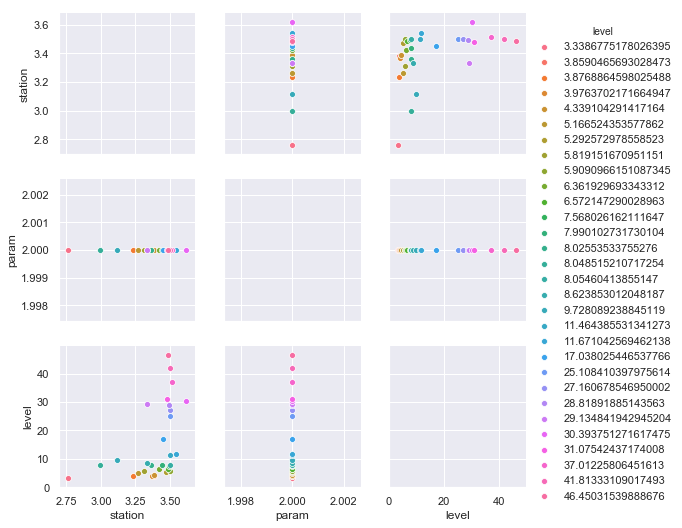

In [36]:
sns.pairplot(datapara2,hue='level', height=2.5);

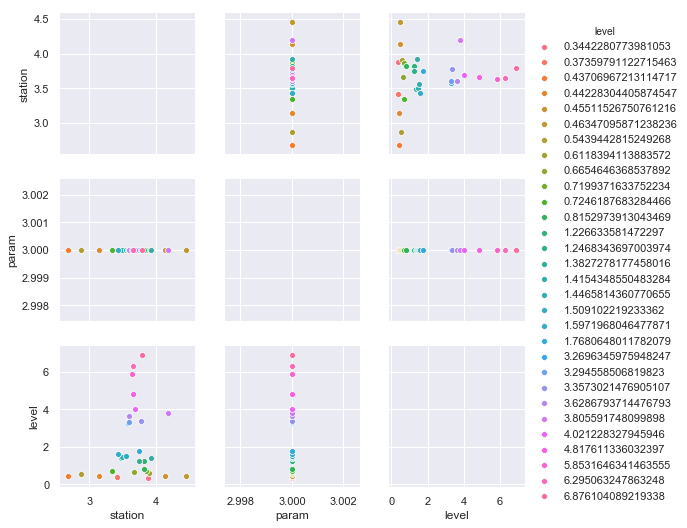

In [37]:
sns.pairplot(datapara3,hue='level', height=2.5);

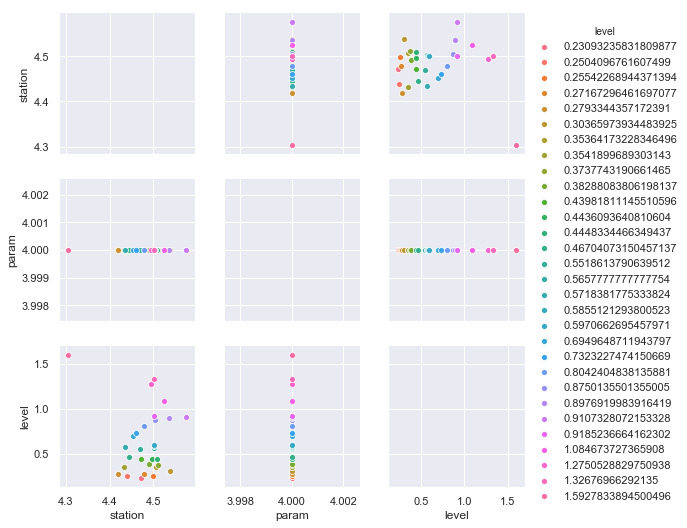

In [38]:
sns.pairplot(datapara4,hue='level', height=2.5);

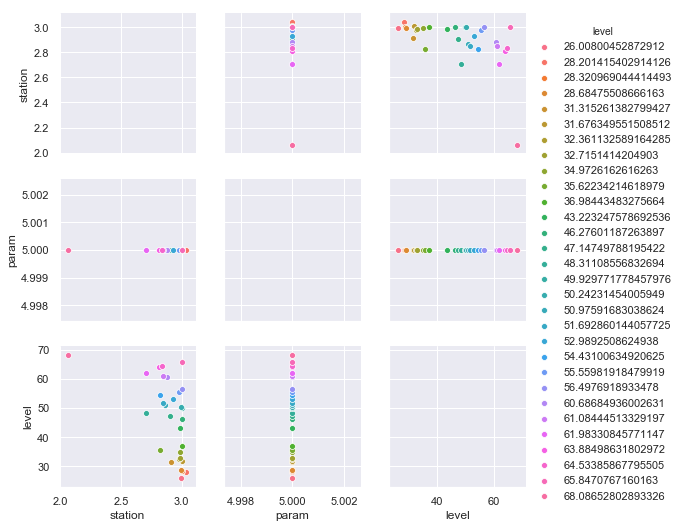

In [39]:
sns.pairplot(datapara5,hue='level', height=2.5);

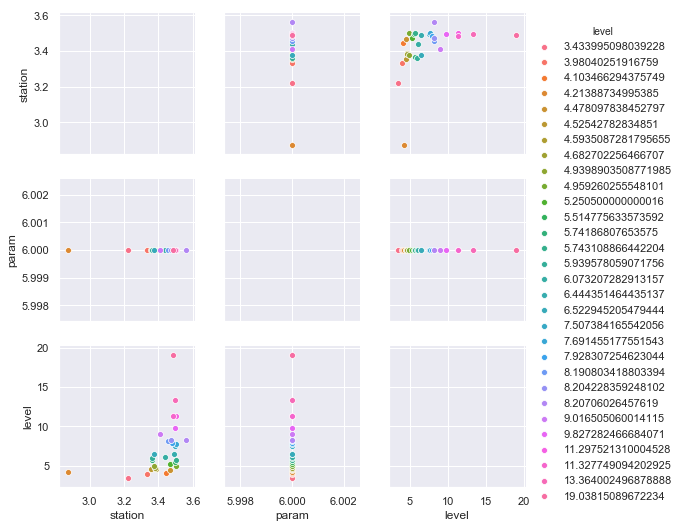

In [40]:
sns.pairplot(datapara6,hue='level', height=2.5);

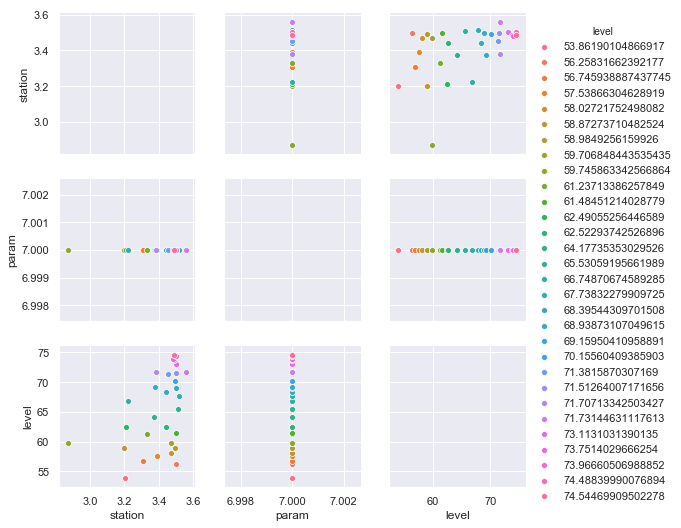

In [41]:
sns.pairplot(datapara7,hue='level', height=2.5);

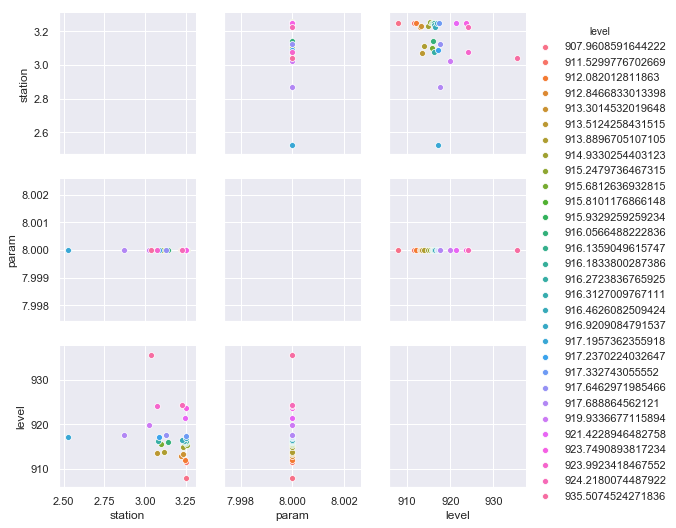

In [42]:
sns.pairplot(datapara8,hue='level', height=2.5);

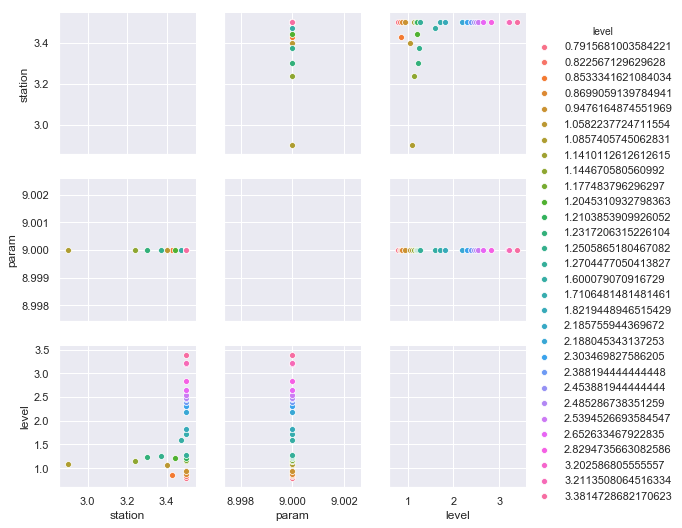

In [43]:
sns.pairplot(datapara9,hue='level', height=2.5);

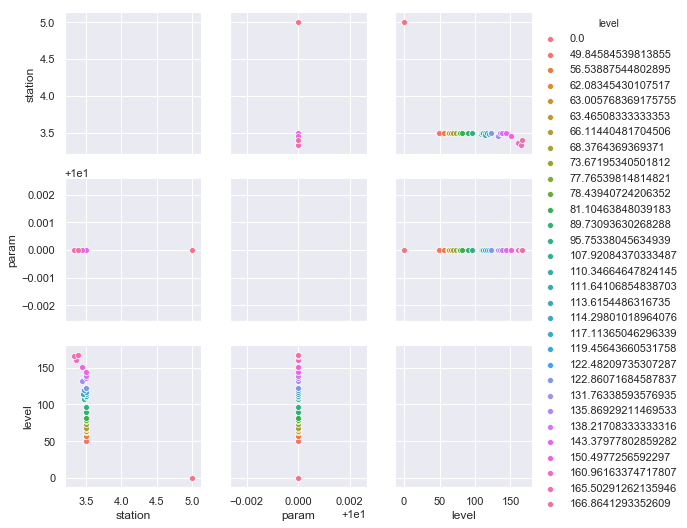

In [44]:
sns.pairplot(datapara10,hue='level', height=2.5);

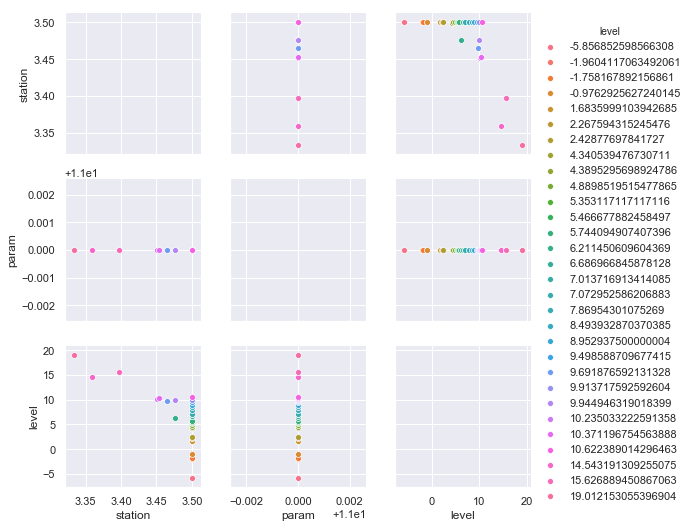

In [45]:
sns.pairplot(datapara11,hue='level', height=2.5);